## Fraud Detection Model
https://www.kaggle.com/competitions/ieee-fraud-detection/data

In [1]:
import numpy as np
import pandas as pd
import tqdm as tqdm
from sklearn.model_selection import GroupKFold
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# exclude_columns = {"TransactionID", "isFraud", "TransactionDT", "TransactionAmt"}

# with open("unique_values.txt", "w") as file:
#     for col in train_data.columns:
#         if col not in exclude_columns:
#             unique_vals = train_data[col].unique() 
#             unique_vals_str = ", ".join(map(str, unique_vals))  
#             file.write(f"{col}: {unique_vals_str}\n")  


In [2]:
train_data = pd.read_csv("./Data/train_combined.csv")

In [3]:
test_data = pd.read_csv("./Data/test_combined.csv")

In [4]:
train_data

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
test_data

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3663549,18403224,31.950,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.000,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.000,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.950,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.950,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506686,4170235,34214279,94.679,C,13832,375.0,185.0,mastercard,224.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
506687,4170236,34214287,12.173,C,3154,408.0,185.0,mastercard,224.0,debit,...,chrome 43.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,ALE-L23 Build/HuaweiALE-L23
506688,4170237,34214326,49.000,W,16661,490.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
506689,4170238,34214337,202.000,W,16621,516.0,150.0,mastercard,224.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
print("Train Data shape:", train_data.shape)
print("Test Data shape:", test_data.shape)

Train Data shape: (590540, 434)
Test Data shape: (506691, 433)


### Feature Selection base on domain knowledge
Since M (Matching Feature), C (Masked Count Feature), D (Temporal Data) and V (Engineered Feature) are masked values, I will use variance analysis for these columns if the values are redundant or highly sparse/low variance.

In [10]:
X_train = pd.read_csv('./Data/train_transaction.csv')
train_id = pd.read_csv('./Data/train_identity.csv')

train_tr_len = X_train.shape[0]
train_id_len = train_id.shape[0]

print("Shape of train transactions =", X_train.shape)
print("Shape of train identity =", train_id.shape)

id_ratio = 1 - train_id_len/train_tr_len
id_ratio

Shape of train transactions = (590540, 394)
Shape of train identity = (144233, 41)


0.7557608290716971

Approximately 76% of the training set doesn't have identity information, so we cannot drop ID columns which have <= 76% nulls

In [11]:
drop_id_cols = [col for col in train_id.columns if train_id[col].isnull().sum()/train_id_len >= 0.9]
drop_tr_cols = [col for col in X_train.columns if col != 'isFraud' and X_train[col].isnull().sum()/train_tr_len >= 0.9]

drop_null_cols = drop_id_cols + drop_tr_cols
print(len(drop_null_cols))
drop_null_cols

11


['id_07',
 'id_08',
 'id_21',
 'id_22',
 'id_23',
 'id_24',
 'id_25',
 'id_26',
 'id_27',
 'dist2',
 'D7']

In [12]:
train_data.drop(drop_null_cols, axis=1, inplace=True)
test_data.drop(drop_null_cols, axis=1, inplace=True)
print("Train Data shape after dropping null columns:", train_data.shape) # 434 - 12 = 422
print("Test Data shape after dropping null columns:", test_data.shape) # 433 - 12 = 421

Train Data shape after dropping null columns: (590540, 423)
Test Data shape after dropping null columns: (506691, 422)


### Drop Correlated Columns

In [13]:
def make_corr(df, cols, title=''):
    
    cols = ['TransactionDT'] + cols
    
    plt.figure(figsize=(15,15))
    sns.heatmap(df[cols].corr(), cmap='RdBu_r', annot=True, center=0.0)
    
    if title != '': 
        plt.title(title, fontsize=14)
    else:
        plt.title(cols[0]+' - '+cols[-1],fontsize=14)
    plt.show()

In [14]:
def detect_corr_groups(df, col_subset, threshold=0.9):
    cor = df[col_subset].corr()
    cor.loc[:,:] =  np.tril(cor, k=-1)
    cor = cor.stack()
    return list(cor[cor > threshold].keys())

In [15]:
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    
    master_list = []
    for i in range(0, len(lst), n):
        master_list.append(lst[i:i + n])
        
    return master_list

In [16]:
vesta_columns = [col for col in X_train.columns if col.startswith('V')]
vesta_columns = chunks(vesta_columns, 20)

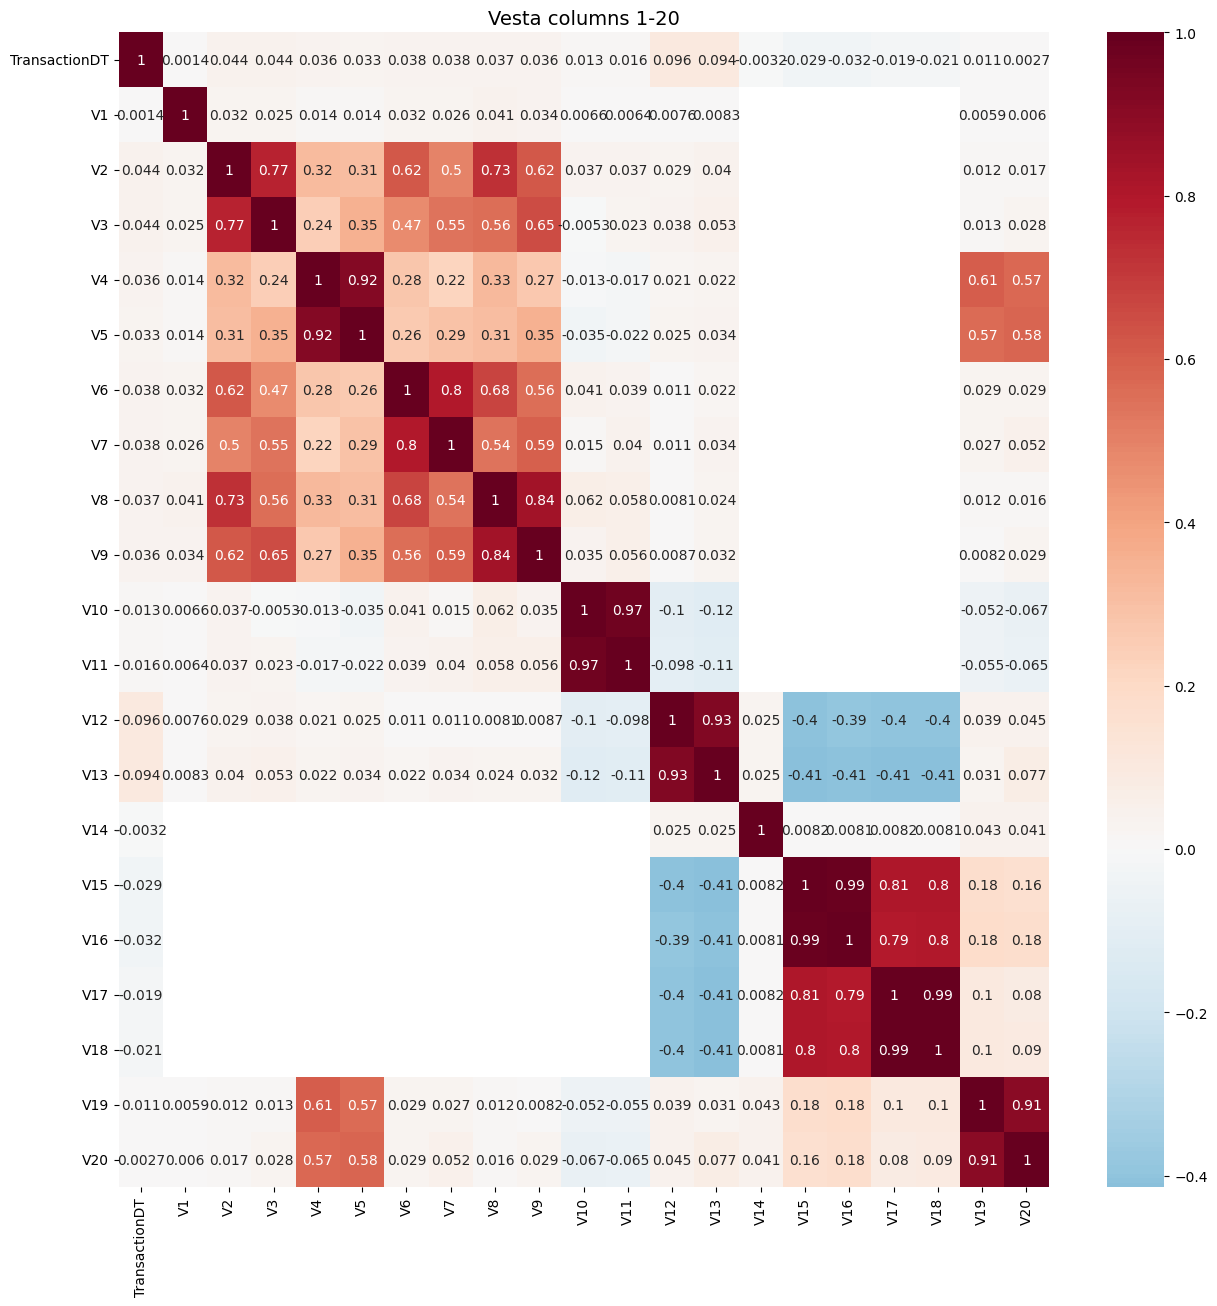

In [17]:
make_corr(X_train, vesta_columns[0], title='Vesta columns 1-20')

In [18]:
def reduce_corr_tuple(df, col1, col2):
    remove_col = None
    
    if df[col1].nunique() > df[col2].nunique():
        remove_col = col1
    else:
        remove_col = col2

    return remove_col

In [19]:
remove_sets = set()

for i in tqdm.tqdm(range(len(vesta_columns))):
    remove_set = set()
    
    corr_pairs = detect_corr_groups(train_data, vesta_columns[i])
    
    for pair in corr_pairs:
        if pair[0] in remove_set or pair[1] in remove_set:
            continue
        else:
            remove_col = reduce_corr_tuple(train_data, pair[0], pair[1])
            remove_set.add(remove_col)
            
    remove_sets = remove_sets.union(remove_set)

100%|██████████| 17/17 [00:10<00:00,  1.57it/s]


In [20]:
remove_sets, len(remove_sets)

({'V102',
  'V103',
  'V106',
  'V11',
  'V111',
  'V126',
  'V127',
  'V128',
  'V13',
  'V133',
  'V134',
  'V137',
  'V139',
  'V144',
  'V145',
  'V147',
  'V148',
  'V149',
  'V150',
  'V151',
  'V153',
  'V155',
  'V156',
  'V157',
  'V16',
  'V163',
  'V164',
  'V167',
  'V168',
  'V17',
  'V178',
  'V179',
  'V183',
  'V186',
  'V187',
  'V190',
  'V193',
  'V196',
  'V197',
  'V198',
  'V20',
  'V202',
  'V203',
  'V204',
  'V211',
  'V212',
  'V213',
  'V216',
  'V218',
  'V219',
  'V22',
  'V221',
  'V224',
  'V232',
  'V233',
  'V234',
  'V237',
  'V238',
  'V244',
  'V248',
  'V250',
  'V254',
  'V256',
  'V257',
  'V259',
  'V265',
  'V266',
  'V27',
  'V271',
  'V272',
  'V275',
  'V278',
  'V280',
  'V291',
  'V295',
  'V296',
  'V298',
  'V30',
  'V302',
  'V303',
  'V306',
  'V307',
  'V308',
  'V31',
  'V315',
  'V317',
  'V318',
  'V323',
  'V324',
  'V326',
  'V330',
  'V331',
  'V332',
  'V333',
  'V336',
  'V339',
  'V34',
  'V36',
  'V4',
  'V40',
  'V42',
  'V4

In [21]:
train_data.drop(remove_sets, axis=1, inplace=True)
test_data.drop(remove_sets, axis=1, inplace=True)
print("Train Data shape after dropping correlated columns:", train_data.shape) # 422 - 118 = 304
print("Test Data shape after dropping correlated columns:", test_data.shape) # 421 - 118 = 303


Train Data shape after dropping correlated columns: (590540, 305)
Test Data shape after dropping correlated columns: (506691, 304)


### Encode Categorical Variables

In [22]:
one_hot_cols = ['ProductCD', 'card4', 'card6', 'M4', 'id_12', 'id_15', 'id_34']
binary_cols = ['M1', 'M2', 'M3', 'M5', 'M6', 'M7', 'M8', 'M9', 'id_16', 'id_28',
               'id_29', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType']
freq_cols = ['P_emaildomain', 'R_emaildomain', 'id_30', 'id_31', 'id_33', 'DeviceInfo']

In [23]:
for col in binary_cols:
    assert set(train_data[col]) == set(test_data[col])

#### Binary Encoding

In [24]:
for col in binary_cols:
    mapping = dict(zip([val for val in train_data[col].unique() if not pd.isnull(val)],[0, 1]))
    train_data[col] = train_data[col].replace(mapping).astype(float)
    test_data[col] = test_data[col].replace(mapping).astype(float)

C:\Users\Henry\AppData\Local\Temp\ipykernel_67248\3829625026.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data[col] = train_data[col].replace(mapping).astype(float)
C:\Users\Henry\AppData\Local\Temp\ipykernel_67248\3829625026.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data[col] = test_data[col].replace(mapping).astype(float)
C:\Users\Henry\AppData\Local\Temp\ipykernel_67248\3829625026.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain t

In [25]:
train_data.shape, test_data.shape

((590540, 305), (506691, 304))

#### One-Hot Encoding

In [26]:
for col in one_hot_cols:
    train_data[col + '_one_hot'] = train_data[col].copy()
    test_data[col + '_one_hot'] = test_data[col].copy()

train_data = pd.get_dummies(train_data, columns=one_hot_cols)
test_data = pd.get_dummies(test_data, columns=one_hot_cols)

train_data.shape, test_data.shape

((590540, 330), (506691, 326))

In [27]:
missing_cols = set(train_data.columns) - set(test_data.columns)

for col in missing_cols:
    test_data[col] = 0

In [28]:
train_data.rename({col + '_one_hot': col for col in one_hot_cols}, axis=1, inplace=True)
test_data.rename({col + '_one_hot': col for col in one_hot_cols}, axis=1, inplace=True)

In [29]:
train_data.shape, test_data.shape

((590540, 330), (506691, 330))

#### Frequency Encoder

In [33]:
class FreqEncoder:
    
    def __init__(self, col):
        self.col = col
        self.total_rows = 0
        self.value_map = {}
        
    def freq_map(self):
        return {k: v/self.total_rows for k, v in self.value_map.items()}
    
    def predict_values(self, row):
        if pd.isnull(row[self.col]):
            return row[self.col]
        
        return self.value_map.get(row[self.col], 0)/self.total_rows
        
    def encode(self, row):
        self.total_rows += 1
        
        if pd.isnull(row[self.col]):
            return row[self.col]
        
        value = row[self.col]
        
        curr_freq = self.value_map.get(value, 0)
        curr_rows = self.total_rows - 1 if self.total_rows != 1 else 1
        
        self.value_map[value] = curr_freq + 1
        
        return curr_freq/curr_rows

In [34]:
for i in tqdm.tqdm(range(len(freq_cols))):
    col = freq_cols[i]
    
    fe = FreqEncoder(col)
    train_data[col + '_fe'] = train_data.apply(fe.encode, axis=1)
    test_data[col + '_fe'] = test_data.apply(fe.predict_values, axis=1)

100%|██████████| 6/6 [01:39<00:00, 16.51s/it]


#### Expanding Window Aggregations on Identity Features

In [35]:
import pandas as pd

class TimeBasedExpandingAggregation:
    """
    A class for time-based expanding aggregation encoding.

    Attributes:
        col1 (str): The column representing aggregation keys.
        col2 (str): The column representing values to be aggregated.
        agg_map (dict): Stores the count of occurrences for each aggregation key.
        value_map (dict): Stores the count of (value, aggregation key) pairs.
    """

    def __init__(self, col1, col2):
        """
        Initializes the TimeBasedExpandingAggregation class.

        Args:
            col1 (str): The column name representing the aggregation key.
            col2 (str): The column name representing the value to be aggregated.
        """
        self.col1 = col1
        self.col2 = col2
        self.agg_map = {}   # Tracks total occurrences per agg key
        self.value_map = {}  # Tracks occurrences of (value, agg key) pairs

    def get_frequency_map(self):
        """
        Computes the frequency of each (value, agg_key) pair relative to its agg_key count.

        Returns:
            dict: A dictionary mapping (value, agg_key) pairs to their relative frequency.
        """
        return {
            key: count / self.agg_map.get(key[1], 1) 
            for key, count in self.value_map.items()
        }

    def predict(self, row):
        """
        Predicts the frequency of a given row's (value, agg_key) pair.

        Args:
            row (pd.Series): A row of the dataset containing col1 and col2.

        Returns:
            float: The predicted frequency of the value in its aggregation group.
        """
        agg_key = row[self.col1]
        value = row[self.col2]

        if pd.isnull(agg_key) or pd.isnull(value):
            return None

        return self.value_map.get((value, agg_key), 0) / self.agg_map.get(agg_key, 1)

    def encode(self, row):
        """
        Updates frequency counts for the given row and returns the current frequency.

        Args:
            row (pd.Series): A row of the dataset containing col1 and col2.

        Returns:
            float: The relative frequency of the (value, agg_key) pair in its aggregation group.
        """
        agg_key = row[self.col1]
        value = row[self.col2]

        if pd.isnull(agg_key) or pd.isnull(value):
            return None

        # Update frequency maps
        current_count = self.value_map.get((value, agg_key), 0)
        total_count = self.agg_map.get(agg_key, 0)

        self.value_map[(value, agg_key)] = current_count + 1
        self.agg_map[agg_key] = total_count + 1

        return current_count / total_count if total_count > 0 else 0


In [37]:
id_columns = ['addr1', 'addr2', 'P_emaildomain', 'R_emaildomain', 'card4', 'card6']

In [38]:
X_train = train_data.copy()
X_test = test_data.copy()

In [1]:
# X_train['isFraud'] = y_train

In [40]:
X_train.shape, X_test.shape

((590540, 336), (506691, 336))

In [41]:
X_train.to_csv("./Final_Data/train_set_without_id_features.csv")
X_test.to_csv("./Final_Data/test_set_without_id_features.csv")

In [42]:
X_train = pd.read_csv("./Final_Data/train_set_without_id_features.csv")
X_test = pd.read_csv("./Final_Data/test_set_without_id_features.csv")

X_train.shape, X_test.shape

((590540, 337), (506691, 337))

In [43]:
from itertools import chain, combinations

def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))


id_combinations = [list(l) for l in list(powerset(id_columns)) if 1 <= len(l) <= 4]

In [44]:
agg_cols = ['P_emaildomain', 'R_emaildomain', 'card4', 'card6']
for i in tqdm.tqdm(range(len(agg_cols))):
    col = agg_cols[i]
   
    fa = TimeBasedExpandingAggregation(col,"isFraud")
    X_train[col + '_fa'] = X_train.apply(fa.encode, axis=1)
    X_test[col + '_fa'] = X_test.apply(fa.predict, axis=1)

X_train = X_train.drop(columns=['P_emaildomain', 'R_emaildomain','card4','card6'])
X_test = X_test.drop(columns=['P_emaildomain', 'R_emaildomain','card4','card6'])

X_train.to_csv("./Final_data/train_set_without_id_features_with_agg.csv")
X_test.to_csv("./Final_data/test_set_without_id_features_with_agg.csv")

100%|██████████| 4/4 [01:27<00:00, 21.75s/it]
